# Q10
Tree Based Models - Q10 - 12/July
===================================
An insurance agent recorded information about her current and potential customers. The data is available in 03_health_insurance.csv on Google drive.
https://drive.google.com/drive/folders/1Jl8iDu7nGmrqCECbrLqmVafgwE5PYfiU

Train a decision tree classifier using 80% of the data . Use 5 fold cross validation on the training data to get the best tree depth and min number of sample to split a node. 
Test your data on the remaining data.

    1) How well does the model generalize? 
    2) Can the agent use this to target potential customers?

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("03_health_insurance.csv")
print(df.shape)
df.head(2)

(910, 10)


,custid,sex,is.employed,income,marital.stat,housing.type,recent.move,num.vehicles,age,health.ins
0,2068,F,NaN,11300,Married,Homeowner free and clear,False,2.0,49,True
1,2848,M,True,4500,Never Married,Rented,True,3.0,22,False


In [3]:
df.dropna(axis=0, how='any', inplace=True)
print(df.shape)

(647, 10)


In [4]:
cat_var_list = ['sex', 'is.employed', 'marital.stat', 'housing.type', 'recent.move']
num_var_list = ['income', 'num.vehicles', 'age']

In [5]:
df = pd.get_dummies(df, columns=cat_var_list,  drop_first=True, prefix_sep='_')
df['target'] = np.where(df['health.ins'] == True, 1, 0)

In [6]:
# varify encoding
pd.crosstab(df['health.ins'], df['target'])

target,0,1
health.ins,,
False,105,0
True,0,542


In [7]:
df.columns

Index(['custid', 'income', 'num.vehicles', 'age', 'health.ins', 'sex_M',
       'is.employed_True', 'marital.stat_Married',
       'marital.stat_Never Married', 'marital.stat_Widowed',
       'housing.type_Homeowner with mortgage/loan',
       'housing.type_Occupied with no rent', 'housing.type_Rented',
       'recent.move_True', 'target'],
      dtype='object')

In [8]:
#? pd.get_dummies

In [9]:
x_vars = ['income', 'num.vehicles', 'age', 'sex_M',
         'is.employed_True', 'marital.stat_Married',
         'marital.stat_Never Married', 'marital.stat_Widowed',
         'housing.type_Homeowner with mortgage/loan',
         'housing.type_Occupied with no rent', 'housing.type_Rented',
         'recent.move_True']
y_var = 'target'
X_train, X_test, Y_train, Y_test = train_test_split(df[x_vars], df[y_var], 
                                                    test_size=0.20, random_state=25)

In [10]:
tune_parm_space = {'min_samples_split':list(range(1,40)),
                   'max_depth':list(range(1,40))
                  }

clf = GridSearchCV(DecisionTreeClassifier(), tune_parm_space, cv=5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [11]:
# print accuracy, without model
without_model_accuracy = np.sum(Y_test == 1) / Y_test.shape[0]

In [12]:
print(f"Best Train Score is {np.round(clf.best_score_ * 100, 2)}")
print(f"Best Train Score is {np.round(clf.score(X_test,Y_test) * 100, 2)}")
print(f"Without model, accuracy is {np.round(without_model_accuracy * 100, 2)}")
print("Best Params:", clf.best_params_)

Best Train Score is 84.53
Best Train Score is 80.77
Without model, accuracy is 80.77
Best Params: {'max_depth': 1, 'min_samples_split': 2}


# Answer
    1. The train accuracy is 84% and test accuracy is 81%. But we see that even without any model, the accuracy is same as accuracy on test set. 
    2. There is not much gain on test set accuracy, over without model accuracy(if one does predict every thing as 1). Hence the agent should not use this model.

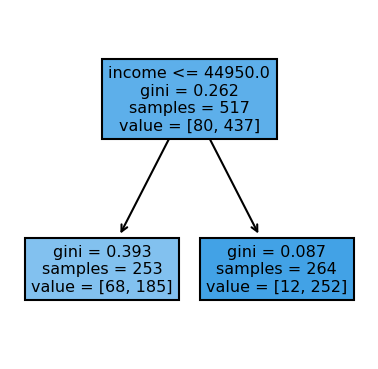

In [13]:
plt.figure(figsize=(3,3), dpi=150)
plot_tree(clf.best_estimator_, feature_names=x_vars, filled=True);